Skład grupy:
    Paweł Awramiuk
    Anna Chojnowska
    Piotr Grusza
    Szymon Leszczyński

In [21]:
## Polecenia do instalacji pakietów
# conda install -c conda-forge tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

## Konfiguracje globalne
# Formatowanie liczb w DataFrame
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [16]:
data_ALL = pd.read_csv("data_ALL.csv")
data_ALL

,Unnamed: 0,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,1345,-0.59,-0.74,0.14,0.64,1.00,-1.46,0.10,0.57,-0.78,...,0,1,0,0,0,0,0,0,0,0
1,1346,-0.82,-0.74,-0.58,-0.73,1.00,-1.46,0.11,0.26,-0.88,...,0,1,0,0,0,0,0,0,0,0
2,1347,0.78,0.55,0.14,-1.19,-0.02,-1.43,0.13,-1.43,0.73,...,0,1,0,0,0,0,0,0,0,0
3,1348,1.02,0.55,0.14,-0.28,-0.02,-1.46,0.18,1.10,-0.50,...,0,1,0,0,0,0,0,0,0,0
4,1349,-0.12,-0.74,-1.31,-1.19,-0.02,-1.41,0.13,-1.10,2.06,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,51303,2.51,0.55,0.14,-0.73,-2.47,1.05,-1.07,-1.54,3.30,...,0,0,0,0,0,0,0,0,0,0
35076,51305,2.09,1.85,-0.58,-1.19,0.92,1.06,-1.05,-0.64,-0.12,...,0,0,0,0,0,0,0,0,0,0
35077,51307,2.23,1.85,0.14,-1.19,-2.01,1.05,-1.08,-1.55,1.40,...,0,0,0,0,0,0,0,0,0,0
35078,51309,2.29,1.85,0.14,-1.19,0.28,1.04,-1.10,-0.59,-0.50,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data_ALL.drop(columns=['Unnamed: 0'], inplace=True)
data_ALL

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,hasParkingSpace,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,-0.59,-0.74,0.14,0.64,1.00,-1.46,0.10,0.57,-0.78,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.82,-0.74,-0.58,-0.73,1.00,-1.46,0.11,0.26,-0.88,0,...,0,1,0,0,0,0,0,0,0,0
2,0.78,0.55,0.14,-1.19,-0.02,-1.43,0.13,-1.43,0.73,0,...,0,1,0,0,0,0,0,0,0,0
3,1.02,0.55,0.14,-0.28,-0.02,-1.46,0.18,1.10,-0.50,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.12,-0.74,-1.31,-1.19,-0.02,-1.41,0.13,-1.10,2.06,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,2.51,0.55,0.14,-0.73,-2.47,1.05,-1.07,-1.54,3.30,0,...,0,0,0,0,0,0,0,0,0,0
35076,2.09,1.85,-0.58,-1.19,0.92,1.06,-1.05,-0.64,-0.12,1,...,0,0,0,0,0,0,0,0,0,0
35077,2.23,1.85,0.14,-1.19,-2.01,1.05,-1.08,-1.55,1.40,0,...,0,0,0,0,0,0,0,0,0,0
35078,2.29,1.85,0.14,-1.19,0.28,1.04,-1.10,-0.59,-0.50,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35080 entries, 0 to 35079
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   squareMeters           35080 non-null  float64
 1   rooms                  35080 non-null  float64
 2   floor                  35080 non-null  float64
 3   floorCount             35080 non-null  float64
 4   buildYear              35080 non-null  float64
 5   latitude               35080 non-null  float64
 6   longitude              35080 non-null  float64
 7   centreDistance         35080 non-null  float64
 8   poiCount               35080 non-null  float64
 9   hasParkingSpace        35080 non-null  int64  
 10  hasBalcony             35080 non-null  int64  
 11  hasElevator            35080 non-null  int64  
 12  hasSecurity            35080 non-null  int64  
 13  hasStorageRoom         35080 non-null  int64  
 14  price                  35080 non-null  int64  
 15  of

In [5]:
train_dataset = data_ALL.sample(frac=0.8, random_state=0)
test_dataset = data_ALL.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [5]:
#sns.pairplot(train_dataset[['price', 'floor', 'squareMeters', 'centreDistance']], diag_kind='kde')

In [6]:
train_features = tf.convert_to_tensor(train_features)
test_features = tf.convert_to_tensor(test_features)

In [19]:
x_data = data_ALL.drop('price', axis=1)
y_data = data_ALL.price

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 0)

In [ ]:
tf.random.set_seed(42)

In [41]:
model = models.Sequential(
[
    layers.InputLayer(input_shape=32,),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.keras.losses.mae,
    metrics=['mean_absolute_error'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 64)                2112      
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,553
Trainable params: 11,553
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(
    X_train,
    y_train,
    epochs=100)

Epoch 1/100
823/823 [==============================] - 3s 3ms/step - loss: 291704.6875 - mean_absolute_error: 291704.6875
Epoch 2/100
823/823 [==============================] - 2s 3ms/step - loss: 121078.8984 - mean_absolute_error: 121078.8984
Epoch 3/100
823/823 [==============================] - 2s 3ms/step - loss: 107048.9922 - mean_absolute_error: 107048.9922
Epoch 4/100
823/823 [==============================] - 2s 3ms/step - loss: 103517.9062 - mean_absolute_error: 103517.9062
Epoch 5/100
823/823 [==============================] - 2s 3ms/step - loss: 101111.1328 - mean_absolute_error: 101111.1328
Epoch 6/100
823/823 [==============================] - 2s 3ms/step - loss: 99401.0469 - mean_absolute_error: 99401.0469
Epoch 7/100
823/823 [==============================] - 2s 3ms/step - loss: 97795.1172 - mean_absolute_error: 97795.1172
Epoch 8/100
823/823 [==============================] - 2s 3ms/step - loss: 96767.0391 - mean_absolute_error: 96767.0391
Epoch 9/100
823/823 [=========

823/823 [==============================] - 2s 3ms/step - loss: 89057.4766 - mean_absolute_error: 89057.4766
Epoch 69/100
823/823 [==============================] - 3s 4ms/step - loss: 89162.0078 - mean_absolute_error: 89162.0078
Epoch 70/100
823/823 [==============================] - 4s 5ms/step - loss: 89081.1172 - mean_absolute_error: 89081.1172
Epoch 71/100
823/823 [==============================] - 4s 5ms/step - loss: 89111.7109 - mean_absolute_error: 89111.7109
Epoch 72/100
823/823 [==============================] - 3s 4ms/step - loss: 89060.0547 - mean_absolute_error: 89060.0547
Epoch 73/100
823/823 [==============================] - 3s 3ms/step - loss: 89101.3203 - mean_absolute_error: 89101.3203
Epoch 74/100
823/823 [==============================] - 2s 3ms/step - loss: 88994.8906 - mean_absolute_error: 88994.8906
Epoch 75/100
823/823 [==============================] - 2s 3ms/step - loss: 89053.4219 - mean_absolute_error: 89053.4219
Epoch 76/100
823/823 [=======================

In [43]:
preds_house = model.predict(X_test)

275/275 [==============================] - 0s 2ms/step


In [44]:
# Importing the evaluation metrics 
from sklearn.metrics import r2_score
# R-score --> evaluation metrics
print('R score is :', r2_score(y_test, preds_house))

R score is : 0.8160681249941828


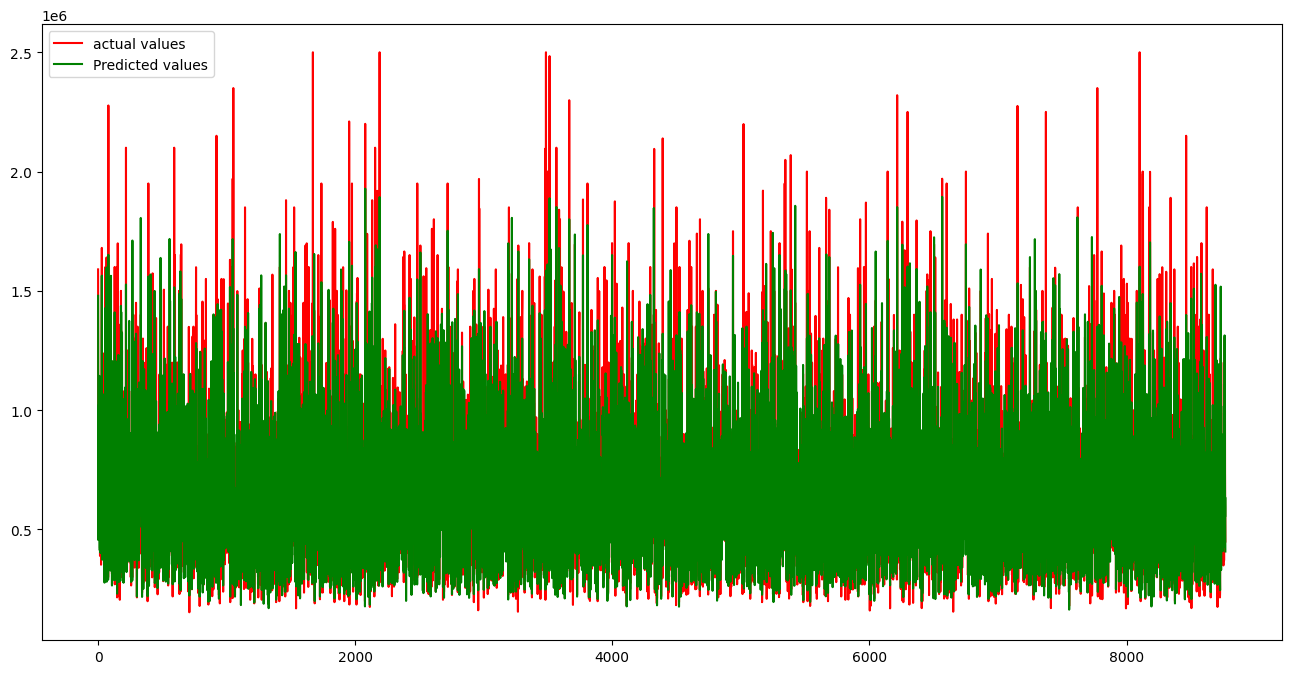

In [45]:
# fitting the size of the plot
plt.figure(figsize=(16, 8))
# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values", c='r')
plt.plot([i for i in range(len(y_test))],preds_house, label="Predicted values", c='g')
# showing the plotting
plt.legend()
plt.show()

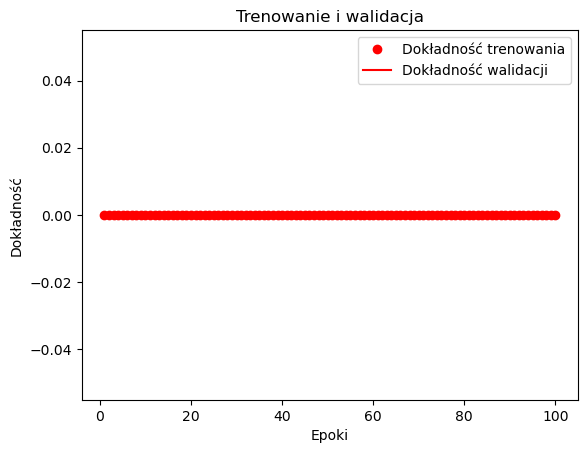

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'ro', label='Dokładność trenowania')
plt.plot(epochs, val_acc, 'r', label='Dokładność walidacji')
plt.title('Trenowanie i walidacja')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

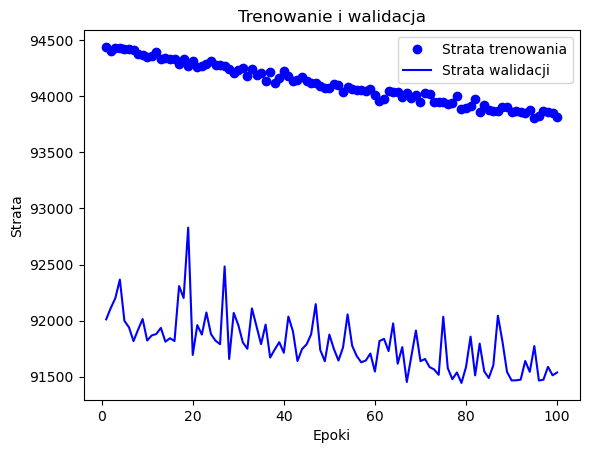

In [22]:
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Trenowanie i walidacja')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

In [20]:
score = model.evaluate(test_features, test_labels)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

220/220 [==============================] - 0s 825us/step - loss: 95132.3047 - accuracy: 0.0000e+00
Test loss:  95132.3046875
Test accuracy:  0.0
